


**1.   importing Libraries**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import seaborn as sns




2.**Connecting to Google Drive**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3.**Reading  datasets From Drive**

In [ ]:
df_fake = pd.read_csv("/content/drive/MyDrive/Fake.csv")
df_real = pd.read_csv("/content/drive/MyDrive/True.csv")

4.**Number of News**

In [ ]:
print("Number of Fake News is = ",df_fake.title.count())
print("Number of Real News is = ",df_real.title.count())

Number of Fake News is =  23481
Number of Real News is =  21417


In [ ]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_real.shape

(21417, 4)

In [ ]:
df_fake.shape

(23481, 4)

**Add new Column (class)**

In [ ]:
df_fake["class"] = "Fake"
df_real["class"] = "Real"

In [ ]:
df_fake.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",Fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",Fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",Fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",Fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",Fake


In [ ]:
df_fake.shape


(23481, 5)

In [ ]:
df_real.shape

(21417, 5)

**Merging datasets  into one**

In [ ]:
df_merge = pd.concat([ df_real,df_fake], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",Real
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",Real
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",Real
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",Real
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",Real


In [ ]:
df_merge.shape

(44898, 5)

**Check if Data Contains Null value or not**

In [ ]:
print(df_merge.isnull().sum())  # printing sum of null values

title      0
text       0
subject    0
date       0
class      0
dtype: int64


In [ ]:
import plotly.express as px
sub_check=df_merge.groupby('subject').apply(lambda x:x['subject'].count()).reset_index(name='Counts')
fig=px.bar(sub_check,x='subject',y='Counts',color='Counts',title='Count of News Articles by type')
fig.show()

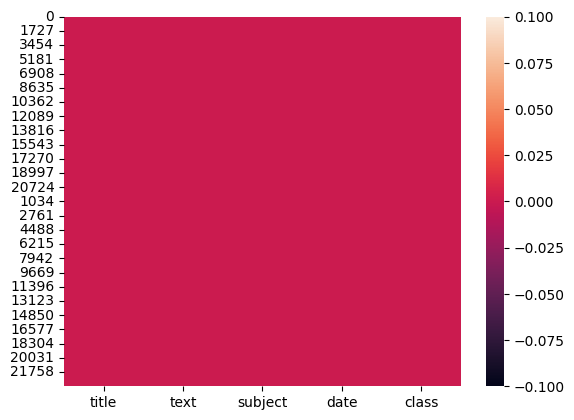

In [ ]:
sns.heatmap(df_merge.isna())   #showing null value in heatmap plot
plt.show()

In [ ]:
#real vs fake
import plotly.express as px
fig = px.pie(df_merge,names='class',title='Proportion of Real vs. Fake News')
fig.show()

**this plot Count  real, fake news**

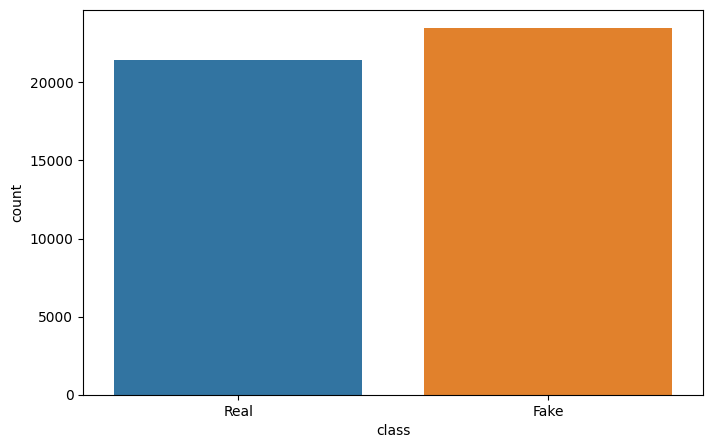

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='class',data=df_merge) #plot for showing numbers of real and fake news
plt.show()

**Shuffling Data**

In [ ]:
df = df_merge.sample(frac = 1)

In [ ]:
df.head(10)

,title,text,subject,date,class
4897,‘Simpsons’ Creator Matt Groening Eerily Fores...,Matt Groening loves to poke fun at everything ...,News,"August 25, 2016",Fake
1450,‘Pay Bribes Here’ Projected On Trump Hotel,"Last night, Trump International Hotel in Washi...",News,"May 16, 2017",Fake
18113,STEVE BANNON JUST MADE A BIG ANNOUNCEMENT Abou...,Former White House Chief Strategist Stephen K....,left-news,"Aug 18, 2017",Fake
14318,Panama illegal drug seizures set to hit record...,PANAMA CITY (Reuters) - Panama is on track to ...,worldnews,"November 21, 2017",Real
16863,MONTEL WILLIAMS Says Oregon Patriots Are “Unde...,"He s pro-gun, pro-military, anti-fracking and ...",Government News,"Jan 5, 2016",Fake
18627,"'Not appropriate,' envoy tells Britain's Boris...",LONDON (Reuters) - Britain s ambassador to Mya...,worldnews,"September 30, 2017",Real
783,Kentucky clerk opposed to gay marriage to run ...,"LOUISVILLE, Ky. (Reuters) - The Kentucky count...",politicsNews,"November 7, 2017",Real
19087,BRITISH COLUMNIST KATIE HOPKINS Has BRUTAL Rea...,"Mack Beggs, the transgender wrestler from Eule...",left-news,"Feb 25, 2017",Fake
11293,Myanmar says U.S. sanctions against general ba...,(Reuters) - Myanmar feels sad over a U.S. de...,worldnews,"December 27, 2017",Real
12162,Man with knife shot at Amsterdam airport; susp...,AMSTERDAM (Reuters) - A Dutchman wielding a kn...,worldnews,"December 15, 2017",Real


In [ ]:
df.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

**Columns of Data**

**Droping Not use Columns**

In [ ]:
df = df.drop(["title", "subject","date"], axis = 1) # drop (Title,Subject,Date) from dataset

**Check if any Null value**

In [ ]:
df.isnull().sum()

text     0
class    0
dtype: int64

**rest Index of data**

In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.head(15)

,text,class
0,Matt Groening loves to poke fun at everything ...,Fake
1,"Last night, Trump International Hotel in Washi...",Fake
2,Former White House Chief Strategist Stephen K....,Fake
3,PANAMA CITY (Reuters) - Panama is on track to ...,Real
4,"He s pro-gun, pro-military, anti-fracking and ...",Fake
5,LONDON (Reuters) - Britain s ambassador to Mya...,Real
6,"LOUISVILLE, Ky. (Reuters) - The Kentucky count...",Real
7,"Mack Beggs, the transgender wrestler from Eule...",Fake
8,(Reuters) - Myanmar feels sad over a U.S. de...,Real
9,AMSTERDAM (Reuters) - A Dutchman wielding a kn...,Real


In [ ]:
df.columns

Index(['text', 'class'], dtype='object')

**Preprocessing on data and removing special character**

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#defining stopwords
stop_words = stopwords.words('english')
stop_words.extend(['use', 're', 'edu', 'from', 'also'])


In [ ]:
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
#function which stop words and the words less than 2 characters
def remove_stop_words (text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
      result.append(token)
  return result

In [ ]:
df.head(10)

,text,class
0,matt groening loves to poke fun at everything ...,Fake
1,last night trump international hotel in washi...,Fake
2,former white house chief strategist stephen k ...,Fake
3,panama city reuters panama is on track to ...,Real
4,he s pro gun pro military anti fracking and ...,Fake
5,london reuters britain s ambassador to mya...,Real
6,louisville ky reuters the kentucky count...,Real
7,mack beggs the transgender wrestler from eule...,Fake
8,reuters myanmar feels sad over a u s de...,Real
9,amsterdam reuters a dutchman wielding a kn...,Real


In [ ]:
df.columns

Index(['text', 'class'], dtype='object')

In [ ]:
df['text'] = df['text'].apply(remove_stop_words)
df['text'] = df['text'].apply(lambda x: " ".join(x))


In [ ]:
df.head(15)

,text,class
0,matt groening loves poke conservative republic...,Fake
1,night trump international hotel washington pla...,Fake
2,white house chief strategist stephen bannon le...,Fake
3,panama city reuters panama track record level ...,Real
4,military anti fracking anti wrongful imprisonm...,Fake
5,london reuters britain ambassador myanmar forc...,Real
6,louisville reuters kentucky county clerk drew ...,Real
7,mack beggs transgender wrestler euless trinity...,Fake
8,reuters myanmar feels decision sanction milita...,Real
9,amsterdam reuters dutchman wielding knife shot...,Real


**SPLITTING DATA**

In [ ]:
x = df["text"]
y = df["class"]

In [ ]:
x[0]

'matt groening loves poke conservative republican hilarious news motto news chopper circles springfield home simpsons comic life hell clear republicanism takes kindly plainly evidence life hell rewrote pledge allegiance times amazing pledges captures right wing bigotry fundie christian culture jingoism reads matt groenig predicted future twitter butch brodie butchbrodie august pledge allegiance wrap flag united states american republicans stands nations jesus rich poor curtailed liberty justice blacks homosexuals women look today hijacked flag waving toting pseudo christians think murica greatest nation earth disagrees opted flag turned symbol wrong right country groening known time predicting future republican party particular pledge time pledge allegiance pledge impertinence flag waving unindicted conspirators america republicans stand abomination underhanded fraud indefensible liberty justice forget plead alignment flakes untitled snakes merry republicrats scam nacho underpants lico

In [ ]:
y[0]

'Fake'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

**Spliting Data into Training and Testing for building Model**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(stop_words='english',max_df=0.7) #ignore terms that appear in more than 70% of the documents
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

**PassiveAggressiveClassifier**

In [ ]:
  classifier = PassiveAggressiveClassifier(max_iter=50)
  classifier.fit(xv_train,y_train)
  y_pred = classifier.predict(xv_test)
  sc = accuracy_score(y_test,y_pred)
  print(f'score: {round(sc*100,2)}%')
  print(classification_report(y_test, y_pred ))

score: 99.24%
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4694
        Real       0.99      0.99      0.99      4286

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



**Logistic Regression Classifier**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression

# Assuming X is your input data with 61713 features and y is the corresponding target variable

# Apply feature selection to match the expected number of features
k = 92050  # Number of features to select to match the expected count
selector = SelectKBest(chi2, k=k)
X_selected = selector.fit_transform(xv_train,y_train)

# Create and train the LogisticRegression model using the selected features
clf = LogisticRegression()
clf.fit(X_selected, y_train)
pred_lr=clf.predict(xv_test)
acc=clf.score(x_test, y_test)
print(f'Accuracy: {round(acc*100,2)}%')

ValueError: ignored

In [ ]:
# from sklearn.linear_model import LogisticRegression

# LR = LogisticRegression()
# LR.fit(xv_train,y_train)


LogisticRegression()

In [ ]:
# pred_lr=LR.predict(xv_test)
# acc=LR.score(xv_test, y_test)
# print(f'Accuracy: {round(acc*100,2)}%')

Accuracy: 98.33%


In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.98      4694
        Real       0.98      0.99      0.98      4286

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
l=DT.score(xv_test, y_test)
print(f'Accuracy: {round(l*100,2)}%')

Accuracy: 99.53%


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)
RR=RFC.score(xv_test, y_test)
print(f'Accuracy: {round(RR*100,2)}%')


Accuracy: 99.08%


In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4694
        Real       0.99      0.99      0.99      4286

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(xv_train , y_train)
y_predict = nb.predict(xv_test)
yy=accuracy_score(y_test , y_predict)
print(f'Accuracy: {round(yy*100,2)}%')

Accuracy: 93.0%


In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        Fake       0.93      0.93      0.93      4694
        Real       0.93      0.93      0.93      4286

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("normalize confusion matrix")
  else:
    print('confusion matric,without normalization')

  thresh = cm.max() / 2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="yellow" if cm[i, j] > thresh else "red")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion Matrix : PassiveAggressiveClassifier
confusion matric,without normalization


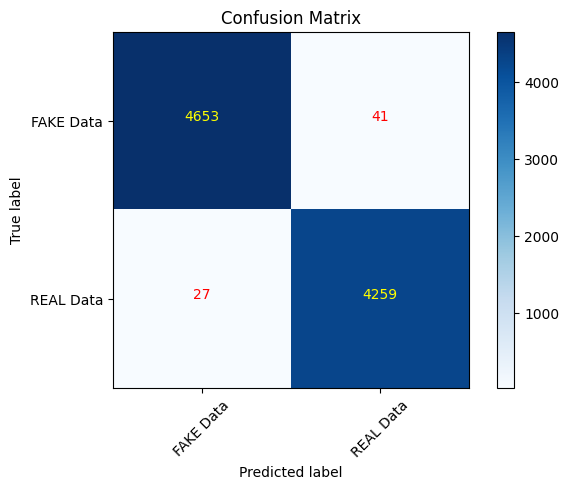

In [ ]:
print("Confusion Matrix : PassiveAggressiveClassifier")
CB = metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(CB, classes=['FAKE Data', 'REAL Data'])

Accuracy: 98.33%
confusion matric,without normalization


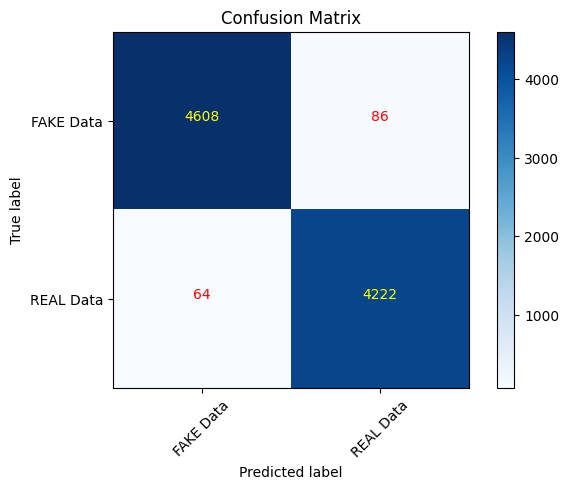

In [ ]:
#Predict and calculate accuracy
# runing on LOGISTIC REGRESSION
pred_lr=LR.predict(xv_test)
score = LR.score(xv_test, y_test)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test,pred_lr)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [ ]:
def check_news(news):
    input_data = [news]
    vectorized_input_data =vectorization.transform(input_data)
    prediction = LR.predict(vectorized_input_data)
    if(prediction=='Real'):
      print("The News is Real")
    else:
      print("The News is Fake")


In [ ]:
check_news("")

The News is Fake


**Saving MOdel into Drive**

In [ ]:
#saving the model into disk
import pickle
pickle.dump(LR,open('Mmm.pkl', 'wb'))